In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
dataset_dir = "C:/Users/HP/Downloads/ProjectAI"

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random as rand
from tensorflow import keras
from tensorflow.keras import models, layers
import tensorflow as tf
import requests
from PIL import Image

In [3]:
import keras
config = tf.compat.v1.ConfigProto(device_count ={'GPU' : 1, 'CPU':56})
sess = tf.compat.v1.Session(config=config)
keras.backend.set_session(sess)

In [4]:
# directory path where the images of cats and dogs is stored
thumbsup = dataset_dir + "/0"
thumbsdown = dataset_dir + "/1"
thumbsleft = dataset_dir + "/2"
thumbsright = dataset_dir + "/3"
upguess = '0'
downguess = '1'
leftguess = '2'
rightguess = '3'

#print(os.listdir(dogpath))

# values for the width and height of a single image
img_resolution = [100,100]

In [5]:
trainData = []
labels =[]
maxlen = 5000

# looping over all cat images in the directory
for upimage in os.listdir(thumbsup):
    # getting the path of a single image
    img = os.path.join(thumbsup,upimage)
    # resizing and displaying the image
    if img.endswith(".jpg"):
      imgarr = cv2.imread(img)
      if imgarr.shape != None:
        # print(imgarr.shape)
        imgarr = cv2.cvtColor(imgarr, cv2.COLOR_RGB2GRAY)
        #imgarr = cv2.resize(imgarr, (img_resolution[0], img_resolution[1]))
        trainData.append(imgarr)
        labels.append([0])
    if(len(trainData) == maxlen/4):
        break
        
# looping over all cat images in the directory
for downimage in os.listdir(thumbsdown):
    # getting the path of a single image
    img = os.path.join(thumbsdown,downimage)
    # resizing and displaying the image
    if img.endswith(".jpg"):
      imgarr = cv2.imread(img)
      imgarr = cv2.cvtColor(imgarr, cv2.COLOR_RGB2GRAY)
      #imgarr = cv2.resize(imgarr, (img_resolution[0], img_resolution[1]))
      trainData.append(imgarr)
      labels.append([1])
    if(len(trainData) == maxlen/4*2):
          break

for rightimage in os.listdir(thumbsright):
    # getting the path of a single image
    img = os.path.join(thumbsright,rightimage)
    # resizing and displaying the image
    if img.endswith(".jpg"):
      imgarr = cv2.imread(img)
      imgarr = cv2.cvtColor(imgarr, cv2.COLOR_RGB2GRAY)
      #imgarr = cv2.resize(imgarr, (img_resolution[0], img_resolution[1]))
      trainData.append(imgarr)
      labels.append([2])

    if(len(trainData) == maxlen/4*3):
        break

for leftimage in os.listdir(thumbsleft):
    # getting the path of a single image
    img = os.path.join(thumbsleft,leftimage)
    # resizing and displaying the image
    if img.endswith(".jpg"):
      imgarr = cv2.imread(img)
      imgarr = cv2.cvtColor(imgarr, cv2.COLOR_RGB2GRAY)
      # print(gray_Scale.shape)
      #imgarr = cv2.resize(imgarr, (img_resolution[0], img_resolution[1]))
      trainData.append(imgarr)
      labels.append([3])
    if(len(trainData) == maxlen):
        break

In [6]:
data = np.array(trainData)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(1600, 480, 640)
(1600, 1)


In [11]:
!pip install -U scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
      --------------------------------------- 0.1/8.4 MB 1.3 MB/s eta 0:00:07
     - -------------------------------------- 0.2/8.4 MB 1.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/8.4 MB 2.6 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/8.4 MB 2.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.0/8.4 MB 3.9 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/8.4 MB 4.2 MB/s eta 0:00:02
     -------- ------------------------------- 1.7/8.4 MB 4.6 MB/s eta 0:00:02
     --------- ------------------------------ 1.9/8.4 MB 4.8 MB/s eta 0:00:02
     ----------- ---------------------------- 2.4/8.4 MB 5.3 MB/s eta 0:00:02
     ------------- -------------------------- 2.9/8.4 MB 5.9 MB/s eta 0:00:01
     --------------- ------------------------ 3.2/8.4 MB 6.1 MB/s eta 0:00:01


In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
onehot_labels = enc.fit_transform(labels).toarray()
enc.categories_

[array([0, 1, 2, 3])]

In [13]:
onehot_labels[1599]

array([0., 0., 0., 1.])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, onehot_labels, test_size=0.2, random_state=42, shuffle=True)

In [15]:
# print the shapes of the training and test sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1280, 480, 640)
y_train shape: (1280, 4)
X_test shape: (320, 480, 640)
y_test shape: (320, 4)


In [12]:
# import numpy as np


# # splitting the data into x and y for training the network
# xtrain = []
# ytrain = []
# # loop all images in data
# for img in trainData:
#     xtrain.append(img[0]) # add the image to x
#     ytrain.append(int(img[1])) # add the result(cat/dog) to y

# # separate the image data and labels into separate arrays
# #X = trainData[:, 0]
# #y = trainData[:, 1]

# # convert the image data and labels to numpy arrays
# xtrain = np.array(xtrain)
# ytrain = np.array(ytrain)


# # split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)





In [13]:
# # displaying the first 16 images in our training data
# plt.figure(figsize=(10,10))
# for i in range(16):
#     plt.subplot(4,4, i+1)
#     plt.imshow(xtrain[i])

In [16]:
X_train = X_train.reshape(-1,480,640,1)

In [17]:
model = models.Sequential()

# first conv layer, 64 neurons, (3x3) shows the feature detector matrix, result would be a feature map
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (480,640,1)))
# hidden maxpooling layer, (2x2) shows the pooling matrix, converts feature map to a smaller image
model.add(layers.MaxPooling2D((2,2)))

# again get a new feature map and apply max pooling to it
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

# the final convulutional layer to get all importance features of an image
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# now we flatten the final feature map and obtain a full convolution map as a flatten 1D array
model.add(layers.Flatten())

# now we pass this into the neural network layers
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))

# output layer, 2 neurons because we have two catagories, softmax because we add all values to get a probabilty(0-1)
model.add(layers.Dense(4, activation = 'softmax'))

# now we compile the model, assign weights etc.
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 638, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 319, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 237, 317, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 118, 158, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 156, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 1158144)           0

In [16]:
# y_train= y_train.reshape(-1,4)

In [18]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
32/32 [==============================] - 259s 8s/step - loss: 610.1570 - accuracy: 0.6025 - val_loss: 0.1255 - val_accuracy: 0.9766
Epoch 2/5
32/32 [==============================] - 231s 7s/step - loss: 6.3887 - accuracy: 0.8340 - val_loss: 0.1153 - val_accuracy: 0.9844
Epoch 3/5
32/32 [==============================] - 230s 7s/step - loss: 0.0107 - accuracy: 0.9971 - val_loss: 0.2544 - val_accuracy: 0.9922
Epoch 4/5
32/32 [==============================] - 238s 7s/step - loss: 0.0221 - accuracy: 0.9980 - val_loss: 0.1466 - val_accuracy: 0.9727
Epoch 5/5
32/32 [==============================] - 238s 7s/step - loss: 0.0127 - accuracy: 0.9990 - val_loss: 0.0517 - val_accuracy: 0.9883


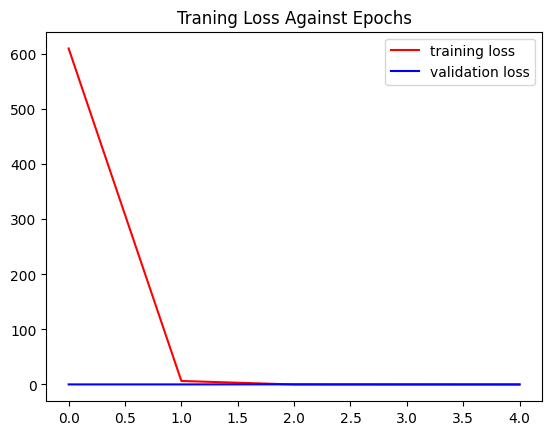

In [19]:
plt.plot(history.history['loss'], color='red', label='training loss')
plt.plot(history.history['val_loss'], color='blue', label='validation loss')
plt.legend()
plt.title('Traning Loss Against Epochs')
plt.show()

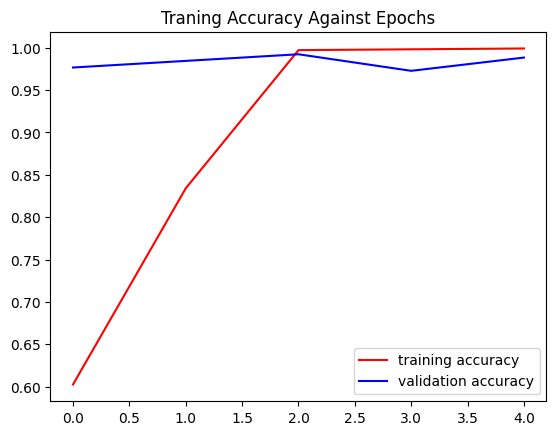

In [20]:
plt.plot(history.history['accuracy'], color='red', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label = 'validation accuracy')
plt.legend()
plt.title('Traning Accuracy Against Epochs')
plt.show()

In [21]:
X_test = X_test.reshape(-1,480,640,1)
model.evaluate(X_test, y_test)

10/10 [==============================] - 12s 1s/step - loss: 0.0117 - accuracy: 0.9969


[0.01167435571551323, 0.996874988079071]

In [22]:
model.save("trained_model.h5")